# Heart Attack Risk Analysis

In [53]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load dataset
df=pd.read_csv("heart.csv")

# Data Cleaning

In [11]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#shape
df.shape

(302, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#check null values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [43]:
df = df.rename(columns={'caa': 'number of major vessels ','thalachh':'MaxHeartRate','trtbps':'RestingBP','cp':'ChestPain'})

df.columns

Index(['age', 'sex', 'ChestPain', 'RestingBP', 'chol', 'fbs', 'restecg',
       'MaxHeartRate', 'exng', 'oldpeak', 'slp', 'number of major vessels ',
       'thall', 'output'],
      dtype='object')

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [8]:
#drop duplicate values
df.drop_duplicates(keep="first",inplace=True)

In [10]:
df.shape

(302, 14)

In [19]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
cat_cols = ['sex','exng','number_of_major_vessels','ChestPain','fbs','restecg']
con_cols = ["age","RestingBP","chol","MaxHeartRate"]
target_col = ["output"]

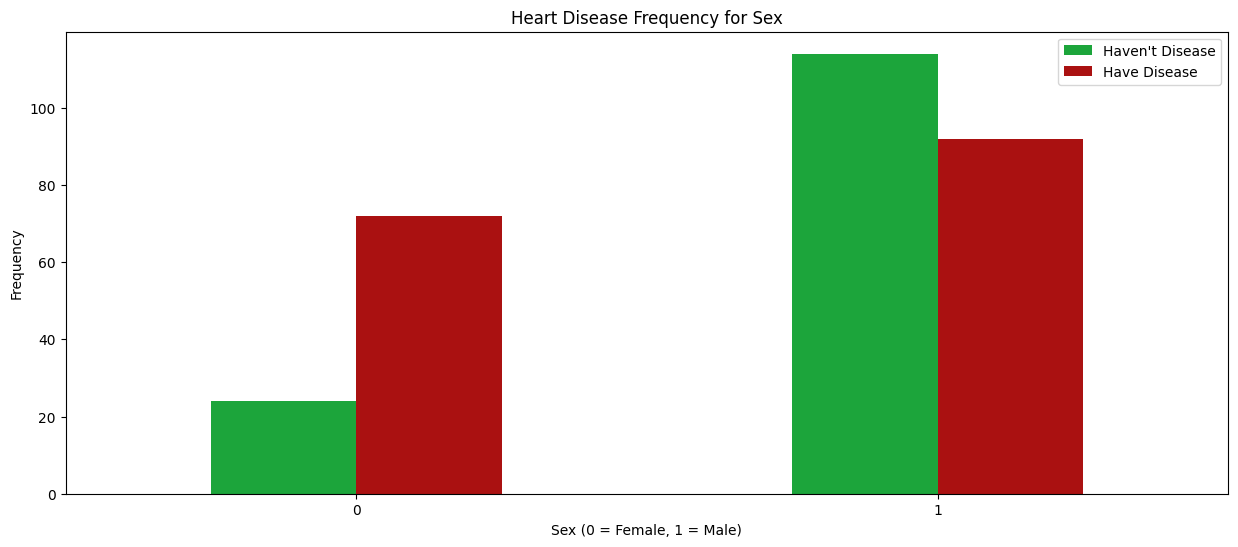

In [26]:
#Heart Disease Frequency wrt Sex
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Freq')

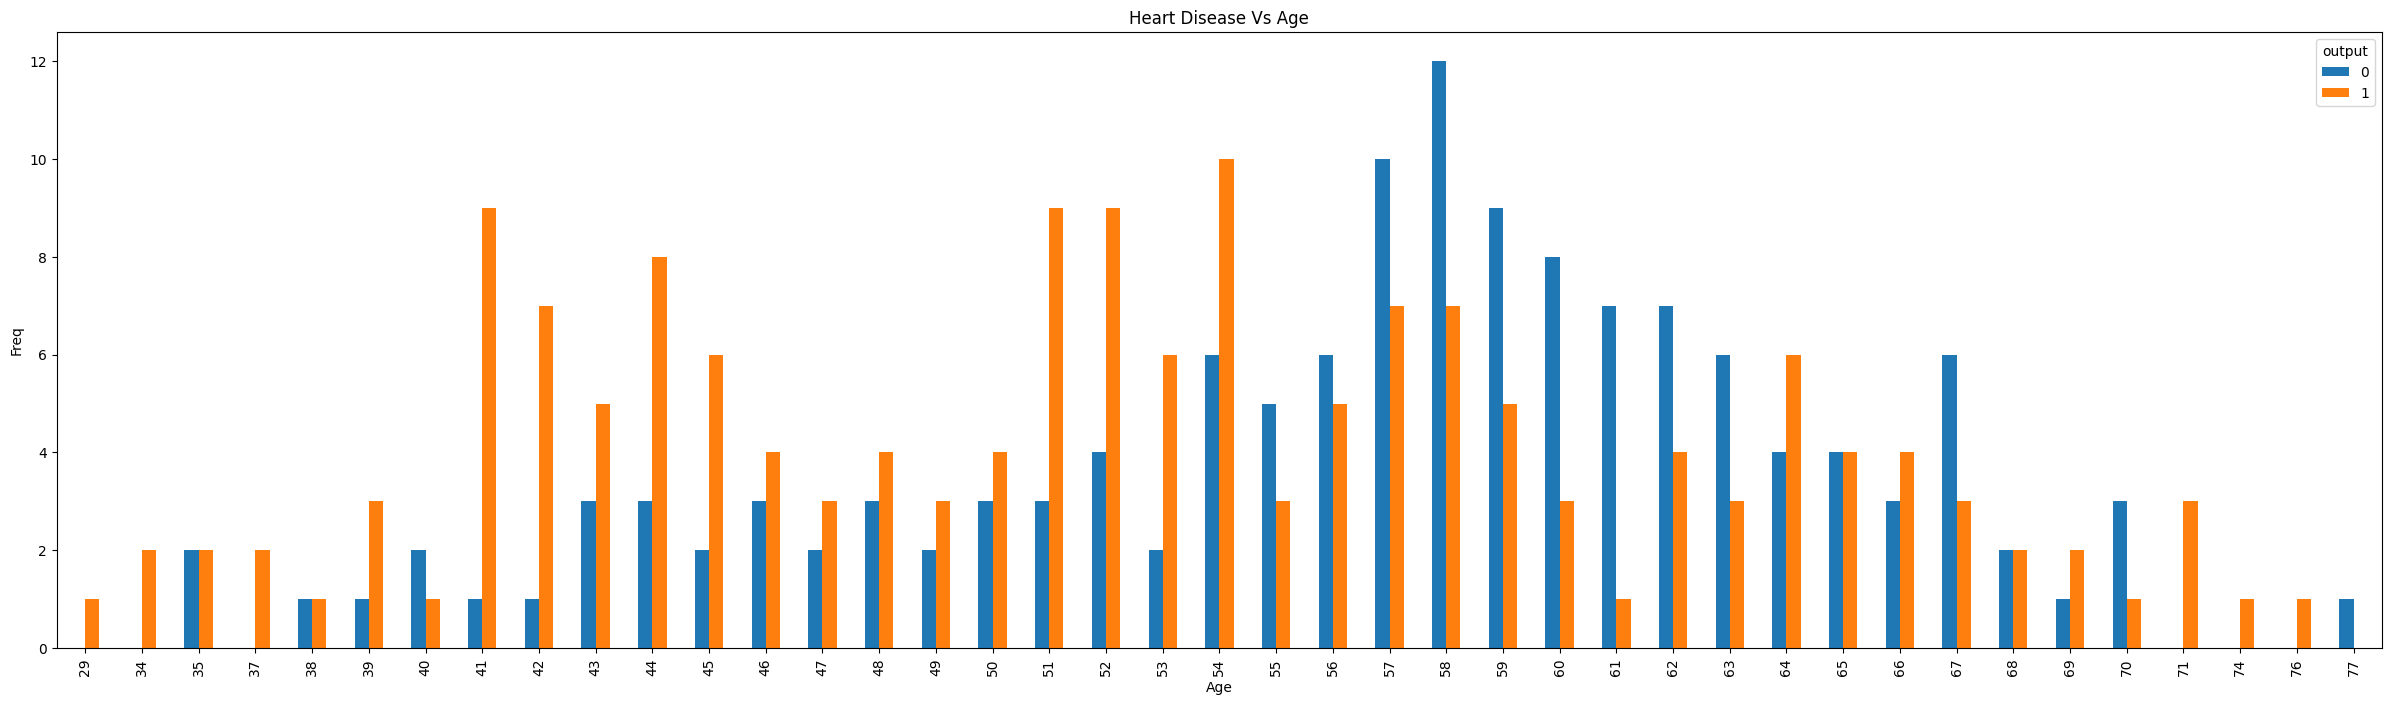

In [35]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(30,8))
plt.title("Heart Disease Vs Age")
plt.xlabel("Age")
plt.ylabel("Freq")


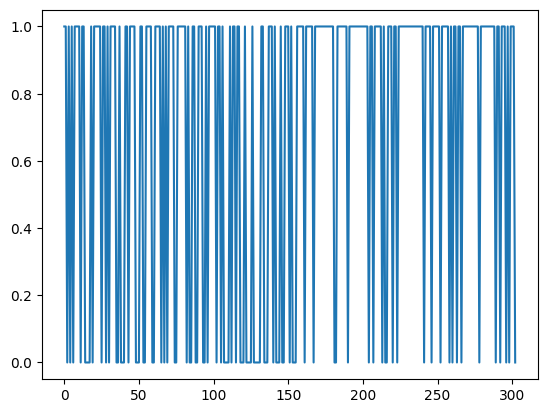

In [37]:
plt.plot(df.sex)

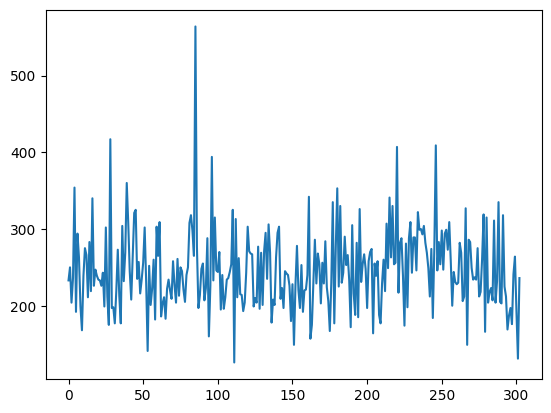

In [39]:
plt.plot(df.chol)
#from fig we can say that chol contains outliers

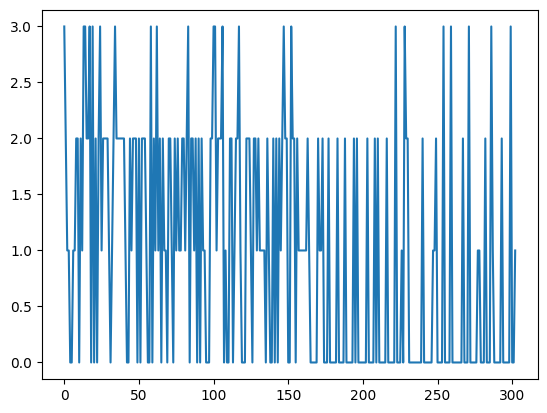

In [44]:
plt.plot(df['ChestPain'])

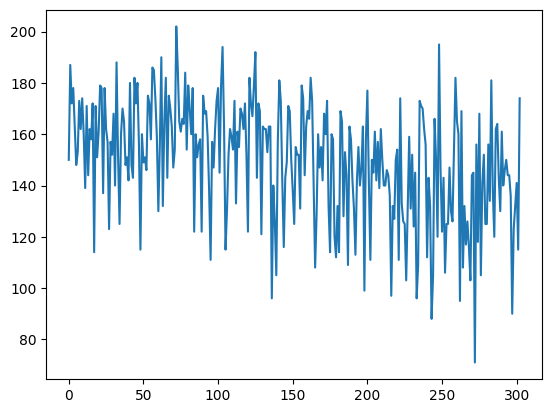

In [49]:
plt.plot(df.MaxHeartRate)

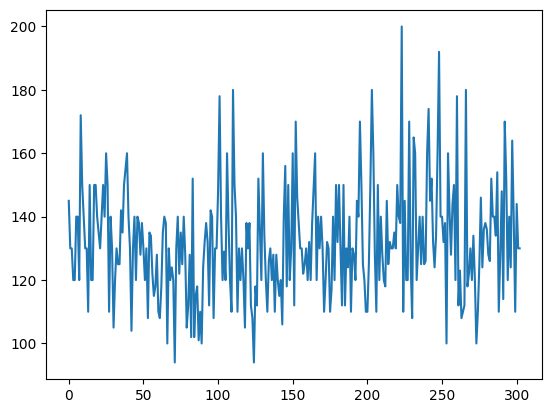

In [50]:
plt.plot(df.RestingBP)

In [34]:
data=['age','sex','chol','MaxHeartRate','ChestPain','fbs','RestingBP','exng']

In [54]:
target=['output']

In [57]:
#split test and train data
x_train,x_test,y_train,y_test=train_test_split(df[data],df[target],test_size=0.3)

(211, 8)

In [58]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [60]:
#score of Logistic Regress
y_pred_lr=lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)

0.8131868131868132

In [62]:
#Decision Tree
df=DecisionTreeClassifier(criterion='entropy',random_state=0)
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
#score of Decision Tree
y_pred_df=df.predict(x_test)
accuracy_score(y_test,y_pred_df)

0.7362637362637363

In [74]:
#SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [76]:
#score of SVC
y_pred_svm=svm.predict(x_test)
accuracy_score(y_test,y_pred_svm)

0.8241758241758241

In [77]:
#Random Forest
rf=RandomForestClassifier(n_estimators=50,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [79]:
#score of Random Forest
y_pred_rf=rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.8241758241758241

## So now we can see that Logistic Regression,SVC and Random Forest perform well on dataset with an accuracy of 82%